In [16]:
# Import libraries

import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
# Read data

mnist = fetch_openml('mnist_784')
inputData, y = mnist["data"], mnist["target"]

In [18]:
# Transform data, converting Input data into "1" and "0" applying One-hot-encoding

mnist = fetch_openml('mnist_784')
inputData, y = mnist["data"], mnist["target"]

inputData = inputData / 255
nDigits = 10 #Numbers from "0" to "9"

yOneHot = np.zeros([y.shape[0],nDigits])
for i in range(y.shape[0]):
    yOneHot[i,int(y[i])]=1

y = yOneHot

In [19]:
# Split data into "Train" and "Test"

m = 60000 # This is the number of rows in the dataset taken for Train
m_test = inputData.shape[0] - m # For test we are taking the rest

y_train, y_test = y[:m,:].reshape(m,nDigits), y[m:,:].reshape(m_test,nDigits)
InputData_train, InputData_test = inputData[:m,:], inputData[m:,:]


np.random.seed(1002) # To ensure obtaining the same results in differents runs

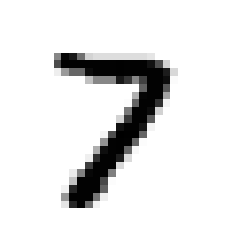

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [20]:
# Show a random input

i = 4000
plt.imshow(InputData_train[i,:].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(y_train[i,:])

In [21]:
# Define activation functions, loss, and their derivatives

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(z):
    return z * (1-z)

def relu (x):
    return np.maximum(0,x) # ReLU is very simple

def relu_derivative(x):
    return 0.5 * (np.sign(x)+1) # ReLU derivative is either zero or 1.

def CrossEntropyLoss(y, y_hat):
    L_sum = np.sum(np.multiply(y, np.log(y_hat)))
    m = y.shape[1]
    L = -(1/m) * L_sum

    return L

def softmax(y):
    return np.exp(y) / np.sum(np.exp(y), axis=0)

def CE_Softmax_Derivative(output, ideal_output):
    return output - ideal_output

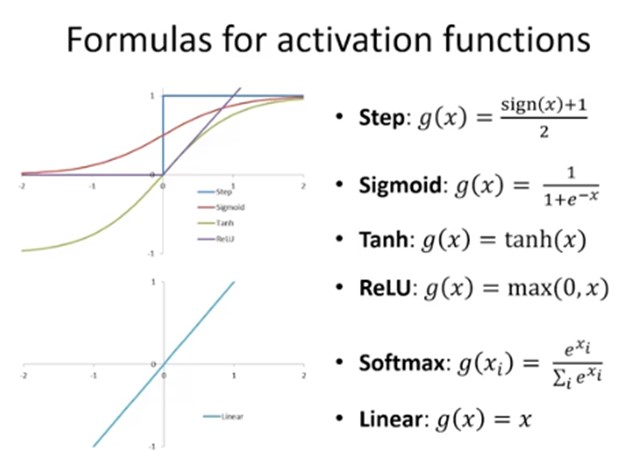

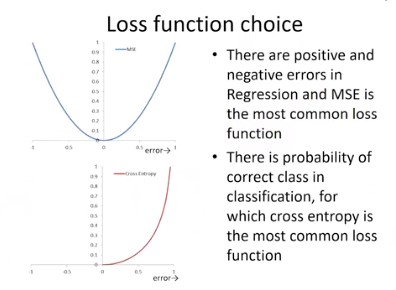

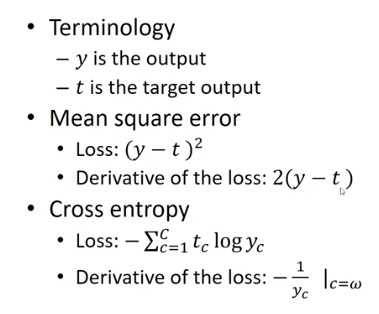

In [22]:
# Define hyperparameters number of hidden layers (nHidden), Learmimg rate, weight decay.

inputDim = InputData_train.shape[1]
nHidden = 64
learning_rate = 1
weight_decay = 0.001 # This is a random small value to regularize the weights during training

W1 = 0.01*np.random.randn(nHidden, inputDim)
b1 = np.zeros((nHidden, 1))
W2 = 0.01*np.random.randn(nDigits, nHidden)
b2 = np.zeros((nDigits, 1))

inputData = InputData_train
y = y_train

# Computational graph of a single hidden layer
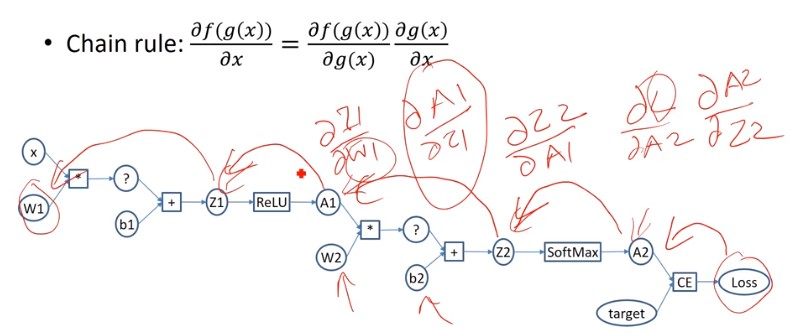



Epoch 0 cost:  2.3025926683067466
Epoch 10 cost:  1.3575995606291273
Epoch 20 cost:  1.5435466738823715
Epoch 30 cost:  1.0957404033897886
Epoch 40 cost:  0.9177537929312684
Epoch 50 cost:  0.5149939683121371
Epoch 60 cost:  0.6243709546432801
Epoch 70 cost:  0.4456593952090175
Epoch 80 cost:  0.34769817498916716
Epoch 90 cost:  0.3251370947235314


<function matplotlib.pyplot.show(*args, **kw)>

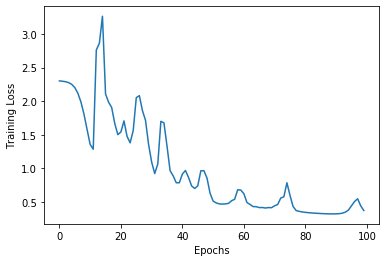

In [23]:
# Define the number of Epochs, train the model anda plot the cost (loss) for each epoch.

nEpochs = 100
costPlot = np.zeros(nEpochs)

for i in range(nEpochs):
    
    # Forward pass
    
    Z1 = np.matmul(W1,inputData.T) + b1
    A1 = relu(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = softmax(Z2)

    cost = CrossEntropyLoss(y.T, A2)
    costPlot[i] = cost
    
    # Backpropagation using chain rule
    
    dZ2 = CE_Softmax_Derivative(A2,y.T)
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1./m) * np.matmul(dZ1, inputData)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)
    
    # Applying regularization with "weight_decay"
    
    W2 -= learning_rate * dW2 + weight_decay * W2 # -= resta a la variable del lado izquierdo el valor del lado derecho.
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1 + weight_decay * W1
    b1 -= learning_rate * db1
    
    if (i % 10 == 0):
        print("Epoch", i, "cost: ", cost)
    
plt.plot(costPlot)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.show

# Train again! Changing hyperparameters (learning rate in this case)

Epoch 0 cost:  0.329891786377773
Epoch 10 cost:  0.3123473503606002
Epoch 20 cost:  0.31033018124799955
Epoch 30 cost:  0.30911785102412026
Epoch 40 cost:  0.30821837574375
Epoch 50 cost:  0.30752757115313345
Epoch 60 cost:  0.30701548171558174
Epoch 70 cost:  0.30664694565791967
Epoch 80 cost:  0.30639012590426407
Epoch 90 cost:  0.3062335470469139


<function matplotlib.pyplot.show(*args, **kw)>

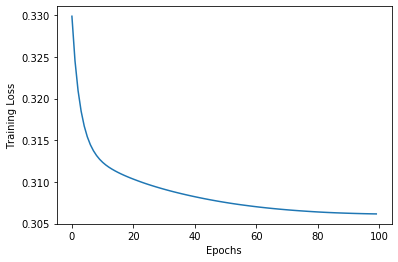

In [24]:
learning_rate = 0.1
nEpochs = 100
costPlot = np.zeros(nEpochs)

for i in range(nEpochs):
    
    # Forward pass
    
    Z1 = np.matmul(W1,inputData.T) + b1
    A1 = relu(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = softmax(Z2)

    cost = CrossEntropyLoss(y.T, A2)
    costPlot[i] = cost
    
    # Backpropagation using chain rule
    
    dZ2 = CE_Softmax_Derivative(A2,y.T)
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1./m) * np.matmul(dZ1, inputData)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)
    
    # Applying regularization with "weight_decay"
    
    W2 -= learning_rate * dW2 + weight_decay * W2 # -= resta a la variable del lado izquierdo el valor del lado derecho.
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1 + weight_decay * W1
    b1 -= learning_rate * db1
    
    if (i % 10 == 0):
        print("Epoch", i, "cost: ", cost)
    
plt.plot(costPlot)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.show

# Let's make predictions and evaluate the model

In [25]:
Z1 = np.matmul(W1, InputData_test.T) + b1
A1 = relu(Z1)
Z2 = np.matmul(W2, A1) + b2

predictions = np.argmax(Z2, axis=0)
labels = np.argmax(y_test.T, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[ 960    0   13    4    1    9   11    3    8   13]
 [   0 1110    5    2    3    2    3   13   10    6]
 [   1    1  926   25    2    4    4   24    9    2]
 [   0    4   10  904    0   39    0    4   15    9]
 [   0    0   18    1  919    9   16    9   11   46]
 [   3    1    1   37    0  764   16    0   21   11]
 [   9    4   13    2   11   15  902    0   10    1]
 [   2    1   13   12    2    7    0  946    9   20]
 [   4   14   30   16    5   36    6    3  866    6]
 [   1    0    3    7   39    7    0   26   15  895]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1022
           1       0.98      0.96      0.97      1154
           2       0.90      0.93      0.91       998
           3       0.90      0.92      0.91       985
           4       0.94      0.89      0.91      1029
           5       0.86      0.89      0.88       854
           6       0.94      0.93      0.94       967
           7       0.92      0.93   

# Check increasin number epochs to 200, learning rate to 0.3 and decrease weight_decay = 0.0001
# Try changing one at a time! 

Epoch 0 cost:  0.30614974338377027
Epoch 10 cost:  0.29955694531709237
Epoch 20 cost:  0.2943091183124571
Epoch 30 cost:  0.2897659921159408
Epoch 40 cost:  0.28567705871657667
Epoch 50 cost:  0.2819217041139702
Epoch 60 cost:  0.27841383156259814
Epoch 70 cost:  0.2751035212270121
Epoch 80 cost:  0.27196701206640533
Epoch 90 cost:  0.2689865616719576
Epoch 100 cost:  0.2661440952707704
Epoch 110 cost:  0.2634163251494579
Epoch 120 cost:  0.26079318486752234
Epoch 130 cost:  0.2582607843947755
Epoch 140 cost:  0.25581814260651276
Epoch 150 cost:  0.2534584541669925
Epoch 160 cost:  0.2511769182650103
Epoch 170 cost:  0.24896426491490295
Epoch 180 cost:  0.2468146620470371
Epoch 190 cost:  0.24472112571806975


<function matplotlib.pyplot.show(*args, **kw)>

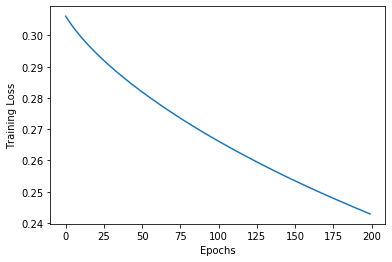

In [26]:
learning_rate = 0.3
nEpochs = 200
costPlot = np.zeros(nEpochs)
weight_decay = 0.0001

for i in range(nEpochs):
    
    # Forward pass
    
    Z1 = np.matmul(W1,inputData.T) + b1
    A1 = relu(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = softmax(Z2)

    cost = CrossEntropyLoss(y.T, A2)
    costPlot[i] = cost
    
    # Backpropagation using chain rule
    
    dZ2 = CE_Softmax_Derivative(A2,y.T)
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1./m) * np.matmul(dZ1, inputData)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)
    
    # Applying regularization with "weight_decay"
    
    W2 -= learning_rate * dW2 + weight_decay * W2 # -= resta a la variable del lado izquierdo el valor del lado derecho.
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1 + weight_decay * W1
    b1 -= learning_rate * db1
    
    if (i % 10 == 0):
        print("Epoch", i, "cost: ", cost)
    
plt.plot(costPlot)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.show

In [27]:
# Check again the accuracy

In [28]:
Z1 = np.matmul(W1, InputData_test.T) + b1
A1 = relu(Z1)
Z2 = np.matmul(W2, A1) + b2

predictions = np.argmax(Z2, axis=0)
labels = np.argmax(y_test.T, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[ 960    0   12    3    1    8   11    1    7   12]
 [   0 1111    5    2    3    2    3    9    8    6]
 [   1    1  949   20    5    2    4   25    7    1]
 [   1    4    8  926    0   36    1    5   17   11]
 [   0    0   11    1  926    4   15    5    9   40]
 [   4    1    0   27    0  792    8    0   23    8]
 [   8    4   13    2   10   15  912    0   11    1]
 [   3    2   10   10    2    3    0  961    9   13]
 [   3   12   21   13    5   22    4    4  873    6]
 [   0    0    3    6   30    8    0   18   10  911]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1015
           1       0.98      0.97      0.97      1149
           2       0.92      0.93      0.93      1015
           3       0.92      0.92      0.92      1009
           4       0.94      0.92      0.93      1011
           5       0.89      0.92      0.90       863
           6       0.95      0.93      0.94       976
           7       0.93      0.95   